In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
import matplotlib.pyplot as plt
from pyspark.sql.functions import avg
from sklearn.linear_model import LinearRegression
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression

In [2]:
# Membuat sesi Spark
spark = SparkSession.builder.appName("PNS_Prediction").getOrCreate()

In [3]:
#Membaca dataset dan mengubahnya menjadi dataframe:
data = spark.read.csv("datapns.csv", header=True, inferSchema=True)

In [5]:
data.printSchema()

root
 |-- Wilayah: string (nullable = true)
 |-- 2017: integer (nullable = true)
 |-- 2018: integer (nullable = true)
 |-- 2019: integer (nullable = true)



In [6]:
data.show()

+-------------+----+----+----+
|      Wilayah|2017|2018|2019|
+-------------+----+----+----+
|        bogor|8120|8619|8120|
|     Sukabumi|6760|7158|6760|
|      Cianjur|6028|6310|6028|
|      Bandung|6993|5486|6993|
|        Garut|7417|5833|7417|
|  Tasikmalaya|5447|3745|5447|
|       Ciamis|4342|6125|4342|
|     Kuningan|5524|7392|5524|
|      Cirebon|6125|5121|6125|
|   Majalengka|5256|7918|5256|
|     Sumedang|4689|5848|4689|
|    Indramayu|6236|4687|6236|
|       Subang|5813|6489|5813|
|   Purwakarta|3610|5794|3610|
|     Karawang|5443|6609|5443|
|       bekasi|5219|5611|5219|
|Bandung Barat|3644|3835|3644|
|  Pangandaran|1777|1910|1777|
|    KotaBogor|3406|6754|3406|
|Kota Sukabumi|1767|3578|1767|
+-------------+----+----+----+
only showing top 20 rows



In [7]:
from pyspark.sql.functions import col

# Looping untuk menghitung jumlah nilai null dalam setiap kolom
null_counts = [data.where(col(c).isNull()).count() for c in data.columns]

# Menggabungkan nama kolom dengan jumlah null-nya
nulls_in_columns = zip(data.columns, null_counts)

# Menampilkan jumlah null dalam setiap kolom
for column, null_count in nulls_in_columns:
    print(f"Kolom '{column}' memiliki {null_count} nilai null")

Kolom 'Wilayah' memiliki 0 nilai null
Kolom '2017' memiliki 0 nilai null
Kolom '2018' memiliki 0 nilai null
Kolom '2019' memiliki 0 nilai null


In [8]:
import pandas as pd
pandas_df = data.toPandas()

<AxesSubplot:>

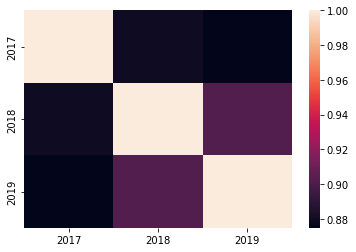

In [9]:
import seaborn as sns
sns.heatmap(data.toPandas().corr(numeric_only=True))

In [10]:
# Membaca nilai korelasi antara dua kolom pada DataFrame
nilai_korelasi = data.corr('2017', '2019')
print("Nilai korelasi antara 2017 dan 2019:", nilai_korelasi)

# Membaca nilai korelasi antara dua kolom pada DataFrame
nilai_korelasi = data.corr('2017', '2019')
print("Nilai korelasi antara 2017 dan 2019:", nilai_korelasi)

Nilai korelasi antara 2017 dan 2019: 0.8748945691313047
Nilai korelasi antara 2017 dan 2019: 0.8748945691313047


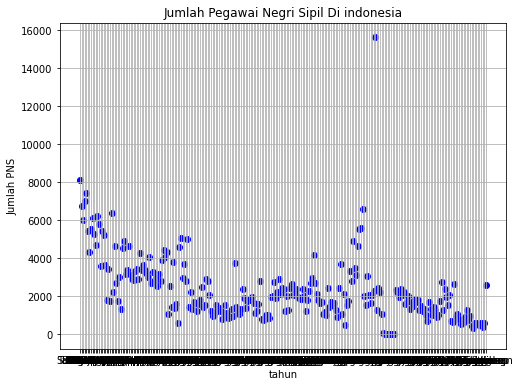

In [12]:
# Visualisasi data menggunakan Matplotlib
plt.figure(figsize=(8, 6))
plt.scatter(pandas_df["Wilayah"], pandas_df['2019'], marker='o', color='blue')
plt.title('Jumlah Pegawai Negri Sipil Di indonesia')
plt.xlabel('tahun')
plt.ylabel('Jumlah PNS')
plt.grid(True)
plt.show()

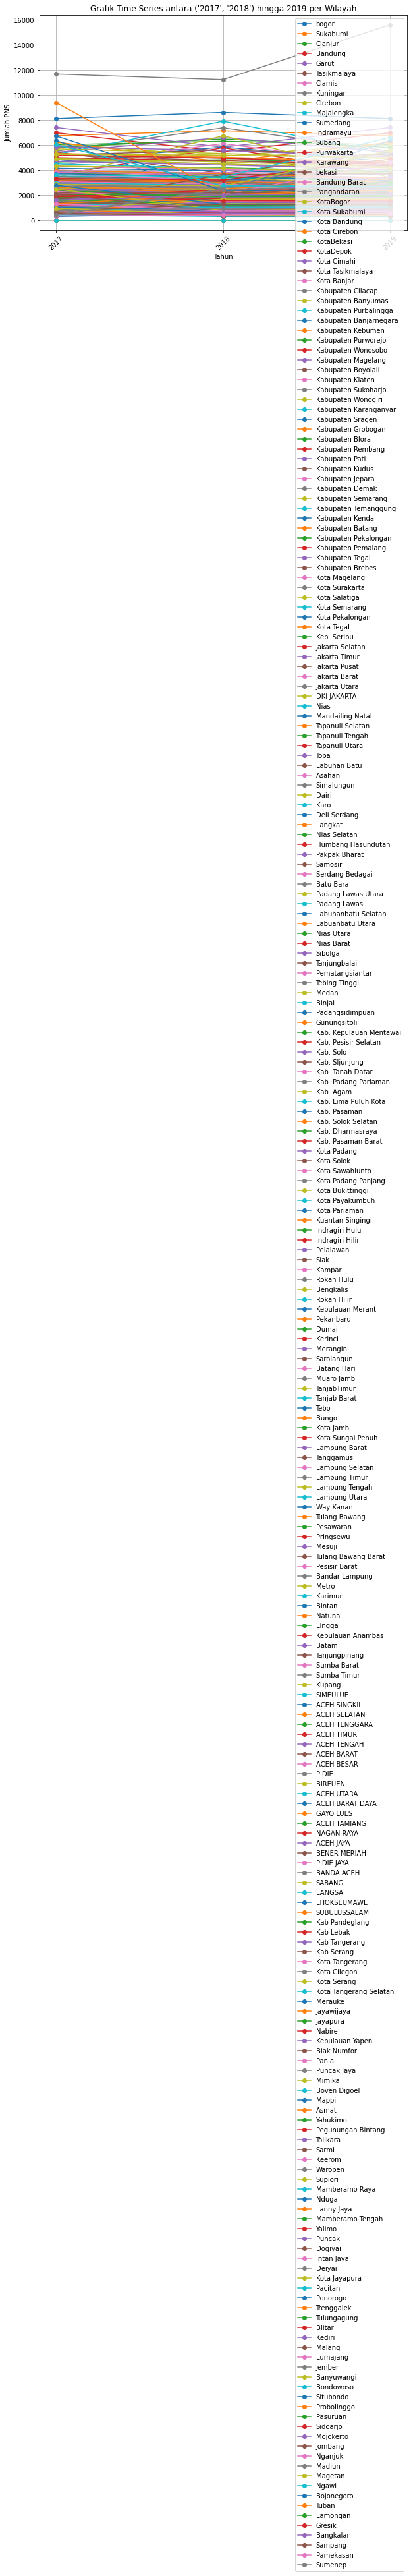

In [14]:
# Menentukan Variabel X dan Y
variable_x = '2017', '2018',
variable_y = '2019'

# Visualisasi grafik time series
plt.figure(figsize=(10, 6))
for index, row in pandas_df.iterrows():
    plt.plot(pandas_df.columns[1:], row.values[1:], marker='o', label=row[0])

plt.xlabel('Tahun')
plt.ylabel('Jumlah PNS')
plt.title(f'Grafik Time Series antara {variable_x} hingga {variable_y} per Wilayah')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [15]:
# Menghitung rata-rata per baris dari kolom-kolom tahunan dan menambahkan kolom avg
data = data.withColumn("Rata-rata 2017-2019", sum(col(c) for c in data.columns[1:]) / len(data.columns[1:]))

# Menampilkan hasil
data.show()

+-------------+----+----+----+-------------------+
|      Wilayah|2017|2018|2019|Rata-rata 2017-2019|
+-------------+----+----+----+-------------------+
|        bogor|8120|8619|8120|  8286.333333333334|
|     Sukabumi|6760|7158|6760|  6892.666666666667|
|      Cianjur|6028|6310|6028|             6122.0|
|      Bandung|6993|5486|6993|  6490.666666666667|
|        Garut|7417|5833|7417|             6889.0|
|  Tasikmalaya|5447|3745|5447|  4879.666666666667|
|       Ciamis|4342|6125|4342|  4936.333333333333|
|     Kuningan|5524|7392|5524|  6146.666666666667|
|      Cirebon|6125|5121|6125|  5790.333333333333|
|   Majalengka|5256|7918|5256|  6143.333333333333|
|     Sumedang|4689|5848|4689|  5075.333333333333|
|    Indramayu|6236|4687|6236|  5719.666666666667|
|       Subang|5813|6489|5813|  6038.333333333333|
|   Purwakarta|3610|5794|3610|             4338.0|
|     Karawang|5443|6609|5443|  5831.666666666667|
|       bekasi|5219|5611|5219|  5349.666666666667|
|Bandung Barat|3644|3835|3644| 

In [16]:
#PEMILIHAN FITUR YANG DIINGINKAN
# Misalnya, jika 'Wilayah' adalah kolom yang ingin Anda prediksi
selected_data = data.select('Wilayah','2017', '2018','2019')
selected_data.show()

+-------------+----+----+----+
|      Wilayah|2017|2018|2019|
+-------------+----+----+----+
|        bogor|8120|8619|8120|
|     Sukabumi|6760|7158|6760|
|      Cianjur|6028|6310|6028|
|      Bandung|6993|5486|6993|
|        Garut|7417|5833|7417|
|  Tasikmalaya|5447|3745|5447|
|       Ciamis|4342|6125|4342|
|     Kuningan|5524|7392|5524|
|      Cirebon|6125|5121|6125|
|   Majalengka|5256|7918|5256|
|     Sumedang|4689|5848|4689|
|    Indramayu|6236|4687|6236|
|       Subang|5813|6489|5813|
|   Purwakarta|3610|5794|3610|
|     Karawang|5443|6609|5443|
|       bekasi|5219|5611|5219|
|Bandung Barat|3644|3835|3644|
|  Pangandaran|1777|1910|1777|
|    KotaBogor|3406|6754|3406|
|Kota Sukabumi|1767|3578|1767|
+-------------+----+----+----+
only showing top 20 rows



In [17]:
#PEMISAHAN DATA TRAINING DAN DATA TESTING
# Memisahkan data menjadi data latih dan data uji dengan perbandingan 80:20
train_data, test_data = selected_data.randomSplit([0.8, 0.2], seed=42)
train_data.show()

+---------------+----+----+----+
|        Wilayah|2017|2018|2019|
+---------------+----+----+----+
|     ACEH BARAT|2042|1947|3119|
|ACEH BARAT DAYA|1326|1286|2030|
|      ACEH JAYA|1331|1294|1645|
|   ACEH SELATAN|2631|2515|3325|
|   ACEH SINGKIL|1569|1538|1758|
|    ACEH TENGAH|2087|2003|3459|
|     ACEH TIMUR|3339|3219|4892|
|     ACEH UTARA|3640|3463|6610|
|         Asahan|2050|2018|1786|
|          Asmat|1737|1481|1466|
|   BENER MERIAH|1362|1289|2049|
|        BIREUEN|2883|2754|5581|
| Bandar Lampung|2821|2628|2424|
|        Bandung|6993|5486|6993|
|  Bandung Barat|3644|3835|3644|
|     Banyuwangi|2496| 798| 941|
|          Batam|2475|2407|2440|
|    Batang Hari|2239|2239|2221|
|      Bengkalis|2713|2501|2409|
|    Biak Numfor|2189|2198|2193|
+---------------+----+----+----+
only showing top 20 rows



In [18]:
test_data.show()

+-------------------+-----+-----+-----+
|            Wilayah| 2017| 2018| 2019|
+-------------------+-----+-----+-----+
|         ACEH BESAR| 2183| 2073| 4647|
|       ACEH TAMIANG| 1779| 1708| 3065|
|      ACEH TENGGARA| 2307| 2172| 2778|
|         BANDA ACEH|11682|11234|15613|
|          Bangkalan|  490|  583|  585|
|          Batu Bara| 1290| 1288| 1240|
|         Bojonegoro|  314|  567|  564|
|            Cirebon| 6125| 5121| 6125|
|       Gunungsitoli| 1168| 1129| 1046|
| Humbang Hasundutan| 1406| 1340| 1241|
|    Indragiri Hilir| 3138| 2854| 2737|
|          Indramayu| 6236| 4687| 6236|
|      Jakarta Barat| 4305| 4054| 3682|
|      Jakarta Utara| 3078| 2983| 2803|
|         Kab Serang|   29|   29|   29|
|       Kab. Pasaman| 1822| 1674| 1616|
| Kabupaten Banyumas| 5710| 5339| 4925|
|Kabupaten Sukoharjo| 3370| 3150| 2898|
|  Kepulauan Anambas|  926|  884|  923|
|       Kota Bandung| 6367| 1874| 6367|
+-------------------+-----+-----+-----+
only showing top 20 rows



In [21]:
#Pembuatan Model Regresi Linear
assembler = VectorAssembler(inputCols=['2017','2018','2019'], outputCol='Total PNS')
train_data = assembler.transform(train_data)
test_data = assembler.transform(test_data)

In [22]:
# Inisialisasi model regresi linear
lr = LinearRegression(featuresCol='Total PNS', labelCol='2019')

In [23]:
# Melatih model menggunakan data latih
model = lr.fit(train_data)

In [24]:
# Melakukan prediksi menggunakan data uji
predictions = model.transform(test_data)

In [25]:
from pyspark.ml.evaluation import RegressionEvaluator

# Misalnya, gunakan RMSE sebagai metrik evaluasi
evaluator_rmse = RegressionEvaluator(labelCol='2019', predictionCol='prediction', metricName='rmse')
evaluator_mae = RegressionEvaluator(labelCol='2019', predictionCol='prediction', metricName='mae')
evaluator_r2 = RegressionEvaluator(labelCol='2019', predictionCol='prediction', metricName='r2')

# Hitung nilai metrik untuk model
rmse = evaluator_rmse.evaluate(predictions)
mae = evaluator_mae.evaluate(predictions)
r2 = evaluator_r2.evaluate(predictions)

# Tampilkan hasil evaluasi
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')

Root Mean Squared Error (RMSE): 7.556785117495326e-14
Mean Absolute Error (MAE): 1.4786970446899383e-14
R-squared (R2): 1.0


In [27]:
# Tampilkan beberapa contoh hasil prediksi
predictions.select('Wilayah', '2017', '2018', '2019', 'prediction').show()


+-------------------+-----+-----+-----+------------------+
|            Wilayah| 2017| 2018| 2019|        prediction|
+-------------------+-----+-----+-----+------------------+
|         ACEH BESAR| 2183| 2073| 4647|            4647.0|
|       ACEH TAMIANG| 1779| 1708| 3065|            3065.0|
|      ACEH TENGGARA| 2307| 2172| 2778|            2778.0|
|         BANDA ACEH|11682|11234|15613|           15613.0|
|          Bangkalan|  490|  583|  585|             585.0|
|          Batu Bara| 1290| 1288| 1240|            1240.0|
|         Bojonegoro|  314|  567|  564|             564.0|
|            Cirebon| 6125| 5121| 6125|            6125.0|
|       Gunungsitoli| 1168| 1129| 1046|            1046.0|
| Humbang Hasundutan| 1406| 1340| 1241|            1241.0|
|    Indragiri Hilir| 3138| 2854| 2737|            2737.0|
|          Indramayu| 6236| 4687| 6236|            6236.0|
|      Jakarta Barat| 4305| 4054| 3682|            3682.0|
|      Jakarta Utara| 3078| 2983| 2803|            2803.